<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Association Learning & Market Basket Analysis</h2>

&nbsp;

### Overview

The Apriori algorithm is a method for efficiently identifying frequent itemsets in tabular data. Once found, these itemsets are then used to create association rules for applications such as Market Basket Analysis. A common example of this algorithm in industry is in e-commerce websites such as Amazon, where market basket analysis powers the *frequently bought together* functionality. This notebook introduces the Apriori algorithm in its use for association rule mining, focussing on market basket analysis as the motivation. The $F_{k-1} \times F_{k-1}$ method for frequent itemset generation is used to improve performance.

&nbsp;

### Contents

Section 1 - Introduction to Association Rule Mining

Section 2 - Frequent Itemset Generation

Section 3 - Rule Generation

Section 4 - Apriori Algorithm

Section 5 - Conclusion

Section 6 - Glossary

Section 7 - Further Reading

### Imports

In [1]:
import csv
import itertools
import matplotlib.pyplot as plt
import pandas as pd

<h2 align="center">Section 1 - Introduction to Association Rule Mining</h2>

### 1.1 - Data Mining

**Data Mining** is the field concerned with extracting information from data, and combines elements from statistics, machine learning, and database systems. This differs from traditional statistics in that discoveries are data-driven, rather than human-driven. Traditional statistics often relies on hypotheses for statistical inference, requiring an element of human knowledge and expertise - unlike data mining where trends are discovered directly from data [1]. A key component of data mining is **Association Rule Mining** (ARM), which is the topic of this notebook.

&nbsp;

### 1.2 - Overview of Association Rule Mining

Association Rule Mining is a method in data mining for identifying relationships between variables in a tabular datasets, typically in the form of a database. The technique has many applications, including: bioinformatics, medical diagnosis, web mining, and scientific analysis, however the most popular application in industry is **Market Basket Analysis** [2]. Association rule mining identifies relationships between variables in an *if-then* format, which can be summarised as:

&nbsp;

$\begin{align}
X \space \space \space \space \space \space \space \rightarrow \space \space \space \space \space \space \space Y
\end{align}$

$\begin{align}
antecedent  \space \space \space \space consequent
\end{align}$

&nbsp;

The terms **antecedent** and **consequent** are used to describe the two terms of the rule, where *if* the antecedent condition is true, *then* the consequent condition is also true with some probability. Note that the rule does not necessarily imply causality, but only co-occurrence. Two conditions are associated with each other in this way, hence the term *association* rule. There are three common metrics used to measure the strength of an association rule: support, confidence, and lift, which are introduced in the following cells.

&nbsp;

### 1.3 - Motivation using Market Basket Analysis

As stated above, the most common use-case for association rule learning is market basket analysis (MBA). This allows the transaction history for a store to be studied, in order to identify trends in the purchasing habits of its customers. For example, an association rule may be discovered that shows around 54% of customers who purchase milk also purchase bread in the same transaction. This shows a strong association between milk and bread, which can be used to inform a number of marketing decisions. For instance, the physical location of items in the store can be revised to place items that are frequently bought together closer to each other. Also, promotions and offers can be more targeted, encouraging customers to purchase more items in each transaction. In more recent times MBA is used heavily in e-commerce, with websites such as Amazon.com featuring a *frequently bought together* section on the listing page for their products. This allows a much more targeted form of advertising, and translates into more sales for the business. Though the applications are much more far-reaching, this notebook will focus on MBA to motivate the topic here.

&nbsp;

### 1.4 - Individual Items and Itemsets

In ARM, each unique value in the data is referred to as an **item**. In the context of MBA, an item is a product that can be purchased from a store. The symbol $I$ is used to denote the set of possible items that are available for purchase, and $T$ denotes the set of all transactions recorded by a store. Typically, these are written as:

&nbsp;

$\begin{align}
I = \{i_0, i_1, i_2, ..., i_d\}
\end{align}$

$\begin{align}
T = \{t_0, t_1, t_2, ..., t_N\}
\end{align}$

&nbsp;

where $d$ is the number of unique items for sale, and $N$ is the number of transactions recorded. Each transaction $t_j$ contains subset of items from $I$, where the number of unique items in the transaction is called the **transaction width**, $w$. Note that one assumption made here is that the amount of each product is irrelevant, and so purchasing milk twice will only show milk once in $t_j$. The transaction width can differ between transactions, since there will be some customers that purchase more or less items in a single transaction. The term **itemset** can be used to describe any possible collection of items from $I$, and is denoted by $X$. The number of items in the itemset can be used to describe the set with the term **k-itemset**, where $k$ is the number of items in the set and can take any value between 0 and $N$ inclusive. The itemset which contains zero items is called the **null set** or **empty set** and is denoted by $\emptyset$. The example below shows a 3-itemset, note that in this transaction each product could have been purchased multiple times. For the purpose of this analysis, only unique products have been recorded. This has some limitations which are discussed later in the notebook.

&nbsp;

$\begin{align}
X = \{\text{milk, bread, cheese}\}
\end{align}$

&nbsp;


### 1.5 - Support Count

The **support count** of an itemset is given by the number of transactions in $T$ that contain the itemset. This quantity is used to calculate the support, confidence, and lift of an association rule, and so is an important quantity. For an itemset $X$, the support count can be defined mathematically as:

&nbsp;

$\begin{align}
\sigma(X) = \big|\{t_j | X \subseteq t_j, t_j \in T \}\big|
\end{align}$

&nbsp;

where $| \space |$ is used to denote number of elements in a set. When assessing association rules, the support count of two itemsets together needs to be considered. That is, if a rule of the form $X \rightarrow Y$ states that $X$ implies $Y$, it is useful to obtain the count of the transactions that contain both $X$ and $Y$. This can be written using the union symbol $\cup$, to describe the itemset containing the items of both $X$ and $Y$:

&nbsp;

$\begin{align}
\sigma(X \cup Y) = \big|\{t_j | X \cup Y \subseteq t_j, t_j \in T \}\big|
\end{align}$

&nbsp;

Note that $X$ and $Y$ should be disjoint itemsets, such that set $Y$ contains no items from set $X$. This is written mathematically by stating the intersection of $X$ and $Y$ is equal to the null set:

&nbsp;

$\begin{align}
X \cap Y = \emptyset
\end{align}$

&nbsp;


### 1.6 - Calculating Support

The **support** of the rule $X \rightarrow Y$ is given by the *proportion* of transactions containing both $X$ and $Y$. This simple calculation gives a measure of how significant an association rule is. For example, if milk ($X$) and bread ($Y$) are rarely purchased in the same transaction, the support for $X \cup Y = \{milk, bread\}$ will be low. In MBA, a low support indicates that there is little association between the products, and offering promotions on bread for customers that buy milk will likely not increase profits. In this way, support is used to discard unhelpful association rules. However, if many transactions do contain both milk and bread then the support will be high, and the rule is significant and should be kept. The formula for calculating the support of $X \rightarrow Y$ is shown below:

&nbsp;

$\begin{align}
s(X \rightarrow Y) = \frac{\sigma(X \cup Y)}{N}
\end{align}$

&nbsp;

where $N$ is the total number of transactions. An itemset is termed a **frequent itemset** if the support surpasses a pre-defined threshold, $minsup$. ARM is used to identify frequent itemsets, as these provide the most potential for increasing profits in stores and e-commerce platforms. 

&nbsp;

### 1.7 - Calculating Confidence

Support is used to measure the significance of an association rule, that is the proportion of the time is it true. **Confidence** on the other hand, is a measure for the reliability of a rule - that is, the probability a transaction contains $Y$, given that it contains $X$. This may seem a subtle difference, but it is an important distinction to make. For instance, there may be many transactions that contain both $X$ and $Y$, but there may be many more transactions that solely contain $X$. The support alone may suggest that there is a strong association between $X$ and $Y$, however the confidence shows that perhaps $X$ is a commonly purchased item, and the relation to $Y$ may be more coincidental. The formula for calculating the confidence of $X \rightarrow Y$ is given by:

&nbsp;

$\begin{align}
c(X \rightarrow Y) = \frac{\sigma(X \cup Y)}{\sigma(X)}
\end{align}$

&nbsp;

A threshold for minimum confidence, $minconf$, can be defined in a similar way to the minimum support. This allows the number of association rules to be reduced further, leaving a smaller collection of strong rules.

&nbsp;

### 1.8 - Association Rule Mining Problem Formation

The goal of ARM is to identify the association rules with support and confidence value that exceed or are equal to the minimum threshold. The brute-force method for solving this problem is to calculate the support and confidence values for each possible association rule. That is create an association rule for each individual product implying the purchase of every other product, then every combination of two products implying the purchase of every individual product and so on. This will continue until a rule is created for each combination of products implying the purchase of every other combination of products, which gives $R$ possible rules:

$\begin{align}
R = 3^d - 2^{d+1} + 1
\end{align}$

For even a small number of possible items, $d$, the number of possible association rules is very large. For example, the number of rules when $k = 10$ is 59,560. This computationally prohibitive for real-world applications since the number of items in $I$ is usually large. This approach is also wasteful, since the majority of rules a likely to be discarded immediately when compared to the minimum support and confidence values.

&nbsp;

<h2 align="center">Section 2 - Frequent Itemset Generation</h2>

### 2.1 - Improving the Brute-Force Approach

The equation for $R$ shows that the number of possible rules for an ARM problem is very large in almost all cases. This makes necessary some improvement to the brute-force approach of calculating the support and confidence for each possible rule. This is achieved using the **Apriori Algorithm**, which is introduced over the following cells. To build the foundations for this, first recall that the support evaluation metric only concerns itself with a single itemset. For use with an association rule, the function must be given the union of two sets that combined into one, $X \cup Y$. It should follow that the following rules will therefore have the same support:

&nbsp;

$\begin{align}
\{\text{milk, bread}\} \rightarrow \{\text{cheese}\}
\end{align}$

$\begin{align}
\{\text{milk, cheese}\} \rightarrow \{\text{bread}\}
\end{align}$

$\begin{align}
\{\text{bread, cheese}\} \rightarrow \{\text{milk}\}
\end{align}$

$\begin{align}
\{\text{milk}\} \rightarrow \{\text{bread, cheese}\}
\end{align}$

$\begin{align}
\{\text{cheese}\} \rightarrow \{\text{milk, bread}\}
\end{align}$

$\begin{align}
\{\text{bread}\} \rightarrow \{\text{milk, cheese}\}
\end{align}$

&nbsp;

Therefore, if the itemset $s(X \cup Y) < minsup$ the entire itemset is deemed **infrequent** and so the confidence values do not need to be calculated for any of the possible association rules above. This realisation allows ARM to be broken into two tasks: **Frequent Itemset Generation** and **Rule Generation**.

&nbsp;

### 2.2 - Item Lattices

The first task of ARM is frequent itemset generation, which is the process of finding which collection of items commonly occur together in the transaction history. An itemset containing 5 items can be used to represent a store which sells 5 products: $a$, $b$, $c$, $d$, and $e$. A dataset with $k$ items contains $2^k - 1$ different combinations of items (excluding the null set), and so there are potentially $2^k - 1$ frequent itemsets. This is rarely the case however, and so frequent itemset generation gives a systematic method to eliminate the infrequent sets. Each possible itemset in $I$ can be shown graphically in a lattice structure called an **itemset lattice**. Below is the itemset lattice for the example used in this cell, which was taken from Chapter 6, page 332 of [3].

<center><img src='images/Itemset Lattice.png' width='50%'></center>

### 2.3 - Pruning the Itemset Lattice

For much larger itemsets the lattice grows exponentially large, and so it is clear to see that finding a way to prune some of the branches will drastically decrease the computation required. This constitutes the first objective of frequent itemset generation: reduce the number of **candidate itemsets**. Each oval in the image above shows a potential itemset that can be deemed *frequent*. But looking at the image it may be obvious to see that if $\{c, d, e\}$ is a frequent itemset, then all the items inside must also be frequent, and all subset combinations. That is, $\{c\}$, $\{d\}$, $\{e\}$, $\{c, d\}$, $\{c, e\}$, and $\{d, e\}$ must all also be frequent. This is called the **Apriori principle** and is the namesake for this algorithm. The image below (taken from Chapter 6, page 334 of [3]) shows a itemset lattice with the Apriori principle applied to select a subset of frequent itemsets.

&nbsp;

<center><img src='images/Frequent Itemset Lattice.png' width='50%'></center>

Similarly, if an itemset is infrequent then all its supersets are infrequent too and so can be removed, this is called **pruning**. For example, if the set $\{a, b\}$ is infrequent, then the sets $\{a, b, c\}$, $\{a, b, d\}$, $\{a, b, e\}$, $\{a, b, c, d\}$, $\{a, b, c, e\}$, $\{a, b, d, e\}$, and $\{a, b, c, d, e\}$ are also infrequent and so can be pruned. Using support values to prune the rule space is known as **support-based pruning**. This is possible due to the fact that the support of a superset can never exceed the support of its subsets, which is as the **anti-monotone** property. The image below shows the item lattice pruned using support-based pruning, and was taken from Chapter 6, page 335 of [3].

<center><img src='images/Infrequent Itemset Lattice.png' width='50%'></center>

&nbsp;

### 2.4 - Frequent Itemset Generation in the Apriori Algorithm

The Apriori algorithm was the first method in ARM to use support-based pruning. This radically reduced the computation time needed to produce a set of association rules, and made once-unachievable problems achievable. The algorithm starts with frequent itemset generation, where each individual item in $I$ (all k-itemsets, where $k$ = 1) is compared to a support threshold value, for example 60%. This means that an item must occur in 60% of the transactions to be taken forward to the next stage. If not, the item and all subsequent supersets are immediately pruned from the itemset lattice. This process is then repeated for the k-itemsets where $k$ = 2, and so on. To reduce computation time further, the support threshold value can be multipled by the number of possible items in $I$, $d$, to obtain a critical support count value. Now instead of dividing by $d$ each to time determine the support, the support count $\sigma$ itself can be used. The process can be summarised using a series of 3 steps:

&nbsp;

Let $C_k$ denote the set of candidate k-itemsets, and $F_k$ denote the set of k-itemsets that are *frequent*.

**Step 1.** Select a support threshold value, e.g. 60%, and multiply by the number of possible items in $I$, denoted by $|I|$.

**Step 2.** Calculate the support count for each 1-itemset ($k$ = 1), and discard the items which do not surpass this value - this is the support-based pruning. This will give $F_1$, which is the set of frequent 1-itemsets.

**Step 3.** Repeat Step 2 for each value of $k$, again pruning the infrequent itemsets. Repeat for each value of $k$ up to $d$, or until the $F_k = \emptyset$.

&nbsp;

### 2.5 - Brute-Force Candidate Generation

Step 2 in the algorithm above relies on the possible candidate k-itemsets to be generated efficiently. That is, finding each possible combination of items for a given value of $k$ is in itself a difficult task and should be performed carefully to avoid increasing the time complexity of the algorithm. One common problem is generating duplicate itemsets unncecessarily. For example, the same itemset $\{a, b, c\}$ can be generated by merging any of the following subsets: 

&nbsp;

$\begin{align}
\{a\} \text{ with } \{b, c\}
\end{align}$

$\begin{align}
\{b\} \text{ with } \{a, c\}
\end{align}$

$\begin{align}
\{c\} \text{ with } \{a, b\}
\end{align}$

$\begin{align}
\{a, b\} \text{ with } \{c\}
\end{align}$

$\begin{align}
\{a, c\} \text{ with } \{b\}
\end{align}$

$\begin{align}
\{b, c\} \text{ with } \{a\}
\end{align}$

&nbsp;

In the brute-force approach every possible candidate set is generated, with the sets not surpassing the minimum support count pruned. The number of sets generated at each level of the itemset lattice is $\begin{pmatrix} d \\ k \end{pmatrix}$, where $d$ is the number of items in $I$. The time complexity of this method is given by:

&nbsp;

$\begin{align}
O \Bigg( \sum^d_{k=1} k \times \begin{pmatrix} d \\ k \end{pmatrix} \Bigg )
\end{align}$

$\begin{align}
= O (d \cdot 2^{d-1})
\end{align}$

&nbsp;

### 2.6 - Efficient Candidate Generation using the $F_{k-1} \times F_{k-1}$ Method

Instead of generating every possible candidate set, combine itemsets from in a top-down approach using the itemset lattice. First examine the 1-itemsets and determine the support for each item, as before prune the items which fail to exceed the minimum support count. Next, generate all the 2-itemsets. From here, $k$-itemsets should be generated by merging $k-1$-itemsets, only if the first $k-2$ items are identical, and the $k-1$ th item is not. For this approach to work, all itemsets must be constructed in **lexicographic order**. This eliminates the possibility of creating a duplicate itemset, and hence reduces the time complexity.

&nbsp;

<h2 align="center">Section 3 - Rule Generation</h2>

### 3.1 - Overview of Rule Generation

Rule Generation is the second task in ARM after Frequent Itemset Generation, and is the process of extracting association rules from frequent itemsets. Each frequent k-itemset can produce up to $2^k - 2$ rules (subtract 2 since $\emptyset \rightarrow Y$ and $Y \rightarrow \emptyset$ can be ignored), and so care should be taken to remove the weaker rules. In this context *weak* refers to low confidence, which is the second metric used to the strength of an association rule.

&nbsp;

### 3.2 - Confidence-Based Pruning

From a frequent 3-itemset there are 6 possible association rules that could be produced. Consider the frequent itemset $\{a, b, c\}$. This can produce the following rules:

&nbsp;

$\begin{align}
\{a\} \rightarrow \{b, c\} \space \space \space \space \space \space \space \space \space \{a, b\} \rightarrow \{c\}
\end{align}$

$\begin{align}
\{b\} \rightarrow \{a, c\} \space \space \space \space \space \space \space \space \space \{a, c\} \rightarrow \{b\}
\end{align}$

$\begin{align}
\{c\} \rightarrow \{a, b\} \space \space \space \space \space \space \space \space \space \{b, c\} \rightarrow \{a\}
\end{align}$

&nbsp;

Clearly not all these rules are guaranteed to share the same confidence, and so it is likely that some rules will exceed the confidence threshold and some will not. The rules that do not exceed the confidence threshold can then be pruned - this process is called **confidence-based pruning**. Recall that the confidence of a rule $X \rightarrow Y$ is given by the support count of the $X \cup Y$ divided by the support count of $X$. These values were previously calculated during the frequent itemset generation step, and so do not need to be calculated again. This eliminates repeated calculations and reduces computation time. If the confidence of a rule $X \rightarrow Y$ does not exceed the threshold, then all rules $X' \rightarrow Y$ where $X' \subset X$ will also not exceed the threshold and so can be discarded. This is because the confidence of $X \rightarrow Y$ uses $\sigma(X)$ as the denominator, which will always be $\leq \sigma(X')$. Hence the confidence of $X'$ can never be larger than the confidence of $X$. This rule is used to prune the rule lattice in the cell below.

&nbsp;

### 3.3 - Applying Confidence-Based Pruning

To prune the set of possible rules, first extract all the high-confidence rules with consequents containing only a single item. Next create rules with consequents containing 2 items by merging the rules and examine the confidence. For example, the rules

&nbsp;

$\begin{align}
\{a, b, c\} \rightarrow \{d\} \space \space \space \space \text{and} \space \space \space \space \{a, b, d\} \rightarrow \{c\}
\end{align}$

can be merged to produce:

$\begin{align}
\{a, b\} \rightarrow \{c, d\}
\end{align}$

&nbsp;

From the rule stated in the cell above, all rules descending from a low-confidence rule can be pruned. The image below (taken from Chapter 6, page 351 from [3]) shows a rule lattice pruned below the rule $\{b, c, d\} \rightarrow \{a\}$. In this example, the rule was found to have low confidence, and so all descending rules must have equal or lower confidence, and so can be removed.

&nbsp;

<center><img src='images/Low Confidence Prune.png' width='50%'></center>

&nbsp;

<h2 align="center">Section 4 - Apriori Algorithm</h2>

### 4.1 - Market Basket Analysis Example

This section implements the Apriori algorithm in Python and applies it a Market Basket Analysis example. The data takes the form of transactions from a supermarket, and was taken from [4]. The data has been read in below and pre-processed using one-hot encoding. This treats each product (column) as a binary variable, which takes the value of 1 if it appears in a transaction (row), or 0 if it does not. One key assumption of the Apriori algorithm is that only unique items are considered, and so quantity of items in a single transaction is irrelevant. This is reflected in this data by its binary nature. For more complex analyses, non-binary data can be used.

In [2]:
# Create list of all possible items
unique_items = set()
with open('datasets/transactions.txt') as f:
    csvreader = csv.reader(f)
    for transaction in csvreader:
        for item in transaction:
            unique_items.add(item.lower())
unique_items = list(unique_items)
unique_items.sort()


# Create dataframe of transactions using one-hot encoding: 0 = not purchased, 1 = purchased
data = []
with open('datasets/transactions.txt') as f:
    csvreader = csv.reader(f)
    for transaction in csvreader:
        row = {item.lower(): 0 for item in unique_items}
        for item in transaction:
            row[item.lower()] = 1
        data.append(row)

transactions_df = pd.DataFrame(data)
transactions_df


,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 - Distribution of Products

The bar charts below have been plotted to visualise the distribution of products in the dataset. The first plot shows the distribution of all the products, with every 10th label displayed for clarity. The plot below shows the top 10 products in terms of frequency across transactions. From these it is clear to see that even the most frequently purchased items rarely occur in more than 10% of transactions.

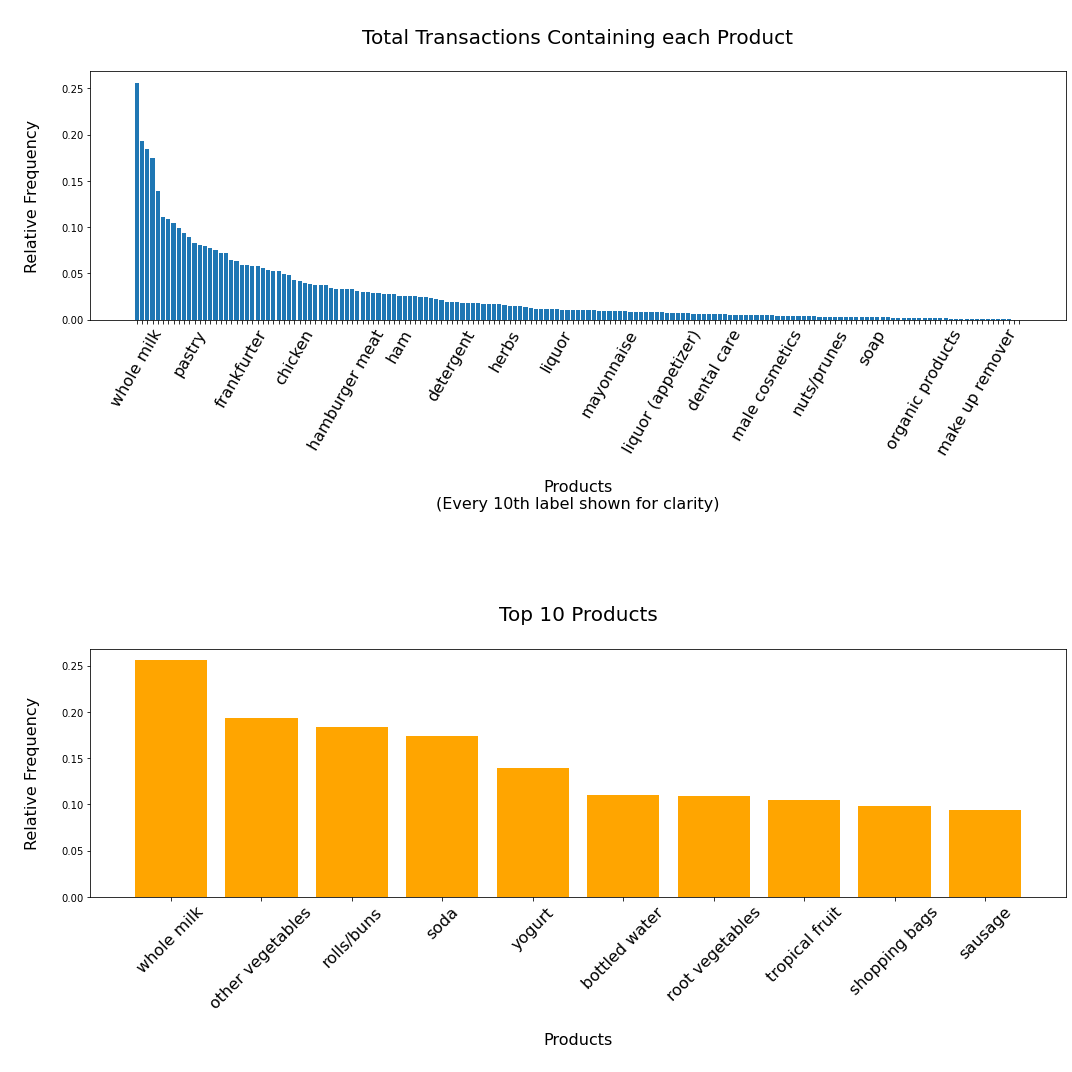

In [3]:
item_sales = transactions_df.sum().sort_values(ascending=False)
N = len(transactions_df)
sales_relative_frequency = item_sales/N
fig, ax = plt.subplots(nrows=2, figsize=(15,15))

# Plot the number of times a product appears at least once in a transactions
ax[0].bar(item_sales.index, sales_relative_frequency)
ax[0].set_title('\nTotal Transactions Containing each Product\n', fontsize=20)
ax[0].set_xlabel('\nProducts\n(Every 10th label shown for clarity)\n', fontsize=16)
ax[0].set_ylabel('\nRelative Frequency\n', fontsize=16)
ax[0].xaxis.set_ticks(item_sales.index)
ax[0].set_xticklabels([label if i%10==0 else '' for i,label in enumerate(item_sales.index)],
                       rotation=60,
                       fontsize=16)

# Plot thetop 5 products
ax[1].bar(item_sales.index[:10], sales_relative_frequency[:10], color='orange')
ax[1].set_title('\n\n\nTop 10 Products\n', fontsize=20)
ax[1].set_xlabel('\nProducts\n', fontsize=16)
ax[1].set_ylabel('\nRelative Frequency\n', fontsize=16)
ax[1].xaxis.set_ticks(item_sales.index[:10])
ax[1].set_xticklabels(item_sales.index[:10],
                       rotation=45,
                       fontsize=16)

fig.tight_layout()

### 4.3 - Apriori Implementation

The cell below implements an apriori algorithm using the $F_{k-1} \times F_{k-1}$ method for frequent itemset generation. To use the model, create an instance of the `Apriori` class, and pass the transaction history as a DataFrame, as well as floats for the minimum support and confidence values. Next, call the `generate_frequent_itemsets` and `generate_rules` methods. All itemsets that surpass the minimum support are demmed frequent and are stored in the `all_frequent_itemsets` attribute. The largest itemsets, that is the k-itemsets where k is a maximum for the minimum support value, are stored in the `largest_frequent_itemsets` attribute. The rules generated from these itemsets that surpass the minimum confidence value are stored in the `all_rules` attribute.

In [4]:
class Apriori:
    ''' An implementation of the Apriori algorithm using the F_(k-1) x F_(k-1) improvement.

    Attributes:
        T (pandas.DataFrame):               Transaction history where each row corresponds to a
                                            unqiue transaction.
        minsup (float):                     The minimum support, as a decimal between 0 and 1, 
                                            representing the fraction of transactions an itemset
                                            must be present in to be considered a frequent itemset.
        minconf (float):                    The minimum confidence, as a decimal between 0 and 1, 
                                            representing the fraction of transactions containing
                                            an itemset X that also contain an itemset Y.
        N (integer):                        Number of transactions in the transaction history.
        sup_thresh (float):                 The threshold for the support count of an itemset to be
                                            considered frequent.
        I (list):                           A list of all possible items in I  
        all_frequent_itemsets (list):       A list of lists, each containing the frequent
                                            k-itemsets.
                                            The lists are in order, with the first containing the
                                            frequent 1-itemsets, the second containing the frequent
                                            2-itemsets, and so on. Each of these lists contains the 
                                            itemsets in tuples.
        largest_frequent_itemsets (list):   The frequent itemsets for the largest possible value of
                                            k given the support threshold. This corresponds to the
                                            final element of the all_frequent_itemsets list.
        all_rules (list):                   A collection of rules for the created from the largest
                                            frequent itemsets, stored as strings.
    '''
    def __init__(self, T, minsup, minconf):
        self.T = T
        self.N = len(self.T)
        self.minsup = minsup
        self.minconf = minconf
        self.sup_thresh = self.minsup * self.N
        self.I = list(self.T.columns)
        self.I.sort()
        self.all_frequent_itemsets = []
        self.largest_frequent_itemsets = []
        self.all_rules = []


    def support_count(self, itemset):
        ''' Calculate the support count of an itemset. 

        Args:
            itemset (list):     A collection of column names which form an itemset to search in
                                transactions_df.
        
        Returns:
            sup_count (int):    The support count for an itemset in the transaction history self.T -
                                corresponds to the number of transactions which contain the itemset.
        '''
        try:
            sup_count = len(self.T.loc[(self.T[itemset] == 1).all(axis=1)])
            return sup_count
        except KeyError:
            print('One or more items were not found in the transactions DataFrame.')

    def support(self, itemset):
        '''
        Args:
            itemset (list):     A collection of column names which form an itemset to search in
                                transactions_df.
        Returns:
            supp (int):         The support for an itemset in the transaction history self.T -
                                corresponds to the number of transactions which contain the itemset
                                divided by the total number of itemsets.
        '''
        try:
            support_count = len(self.T.loc[(self.T[itemset] == 1).all(axis=1)])
            supp = support_count / len(self.T)
            return supp
        except KeyError:
            print('One or more items were not found in the transactions DataFrame.')

    def confidence(self, X, Y):
        '''
            Args:
                X (list):       The itemset found in both the numerator and denominator of the
                                confidence formula. The structure consists of a list of strings.
                Y (list):       The itemset only found in the numerator of the denominator. The
                                structure is identical to X.
        '''
        itemset = X.copy()
        itemset.extend(Y)
        supp_x_y = self.support(itemset)
        supp_x = self.support(X)
        conf = supp_x_y / supp_x
        return conf

    def generate_frequent_itemsets(self):
        ''' Generate a list of the most frequent itemsets based on the minimum support value.

        Using the F_(k-1) x F_(k-1), first generate the frequent 1-itemsets by calculating the
        support for each item and comparing against the minimum support. Append the results to the
        all_frequent_itemsets attribute. Next, generate all the 2-itemsets, sorting each into
        lexicographic order to check the support of the itemset has not already been calculated.
        This improves the performance. If the itemset does not already exist within the
        all_frequent_itemsets attribute then calculate the support. If this value exceeds the
        minimum support then append the itemset to the all_frequent_itemsets attribute, as well as
        the local frequent_itemsets variable. For the itemsets with larger values of k, repeat the
        process, but this time ensure that itemsets are only generated by merging sets which have
        identical values except for the final element - this is F_(k-1) x F_(k-1) rule. Calculate
        the support and append to the all_frequent_itemsets attribute and local frequent_itemsets
        variable if the value exceeds the minimum support. Repeat for larger values of k until no
        larger itemsets can be created. The frequent_itemsets variable is reset when the value of k
        updates, and always contains the k-itemsets for the largest values of k. Assign the
        attribute largest_frequent_itemsets to take the value of frequent_itemsets. Remove the final
        empty entry in the all_frequent_itemsets attribute which gets generated in the final loop
        when checking for the largest value of k.

        Args:
            None.
        
        Returns:
            None.
        '''
        # 1-itemsets
        itemsets = self.I.copy()
        frequent_itemsets = []
        for itemset in itemsets:
            if self.support_count([itemset]) > self.sup_thresh:
                frequent_itemsets.append([itemset])

        self.all_frequent_itemsets.extend(frequent_itemsets)

        # Check larger itemsets
        while len(frequent_itemsets) > 0:
            itemsets = frequent_itemsets.copy()
            frequent_itemsets = []
            k = len(itemsets[0])
            for itemset_1 in itemsets:
                for itemset_2 in itemsets:

                    # 2-itemsets
                    if k == 1:
                        if itemset_1 != itemset_2:
                            new_itemset = [itemset_1[0], itemset_2[0]]
                            # Put into lexicographic order
                            new_itemset.sort()
                            # Only calculate support if not already calculated
                            if new_itemset not in frequent_itemsets: 
                                if self.support_count(new_itemset) > self.sup_thresh:
                                    frequent_itemsets.append(new_itemset)

                    # k-itemsets
                    elif k > 1:
                        if (itemset_1[:-1] == itemset_2[:-1]) and (itemset_1[-1] != itemset_2[-1]):
                            new_itemset = itemset_1.copy()
                            new_itemset.append(itemset_2[-1])
                            new_itemset.sort()
                            if new_itemset not in frequent_itemsets:
                                if self.support_count(new_itemset) > self.sup_thresh:
                                    frequent_itemsets.append(new_itemset)

            self.all_frequent_itemsets.extend(frequent_itemsets)
            if frequent_itemsets != []:
                self.largest_frequent_itemsets = frequent_itemsets
            
        self.all_frequent_itemsets = self.all_frequent_itemsets[:-1]

    def generate_rules(self):
        ''' Generate rules from the itemsets stored in the largest_frequent_itemsets attribute.

        If the number of items in the largest frequent itemsets is 1 then there are no connections
        significant enough (for the given support and confidence levels) to be able to produce any
        association rules and so return None. If this is not the case, construct every permuation
        of the items in the largest frequent itemsets and calculate the confidence of each candidate
        rule. If the confidence surpasses the minimum confidence value, then append the rule (as a
        formatted string) to the all_rules attribute. Fianlly, remove duplicate rules generated in
        the process.

        Args:
            None.

        Returns:
            None.
        '''
        for itemset in self.largest_frequent_itemsets:
            if len(itemset) < 2:
                self.rules = None
            else:
                candidate_rules = list(itertools.permutations(itemset))
                for rule in candidate_rules:
                    if self.confidence(list(rule[:-1]), [rule[-1]]) > self.minconf:
                        formatted_rule = '{'+', '.join(rule[:-1])
                        formatted_rule += '}  ->  {' + rule[-1] + '}'
                        self.all_rules.append(formatted_rule)
        
        # Remove duplicate rules
        self.all_rules = self.all_rules[::2]
                

### 4.4 - Number of Frequent Itemsets vs Support Count Threshold

The number of itemsets that surpass the minimum support threshold decreases as the threshold becomes higher. The rate at which this drop-off occurs varies depending on the dataset, and is a useful characteristic to visualise when tuning the hyperparameters of the model. The graph below shows the number of frequent itemsets generated for different support thresholds.

Text(0.5, 1.0, '\nNumber of Frequent Itemsets Generated for Different Support Thresholds\n')

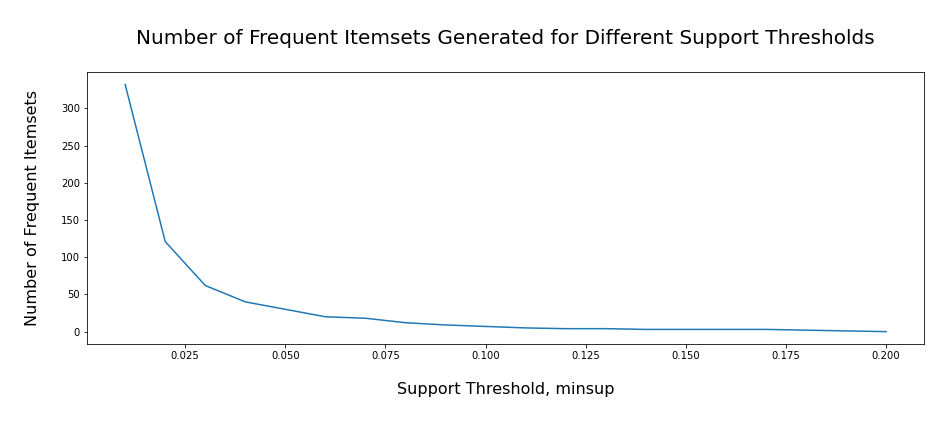

In [5]:
import matplotlib.pyplot as plt
import numpy as np

minsups = np.arange(0.01, 0.21, 0.01)

num_frequent_itemsets = []
for minsup in minsups:
    model = Apriori(transactions_df, minsup, 0.55)
    model.generate_frequent_itemsets()
    num = len(model.all_frequent_itemsets)
    num_frequent_itemsets.append(num)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(minsups, num_frequent_itemsets)
ax.set_xlabel('\nSupport Threshold, minsup\n', fontsize=16)
ax.set_ylabel('\nNumber of Frequent Itemsets\n', fontsize=16)
ax.set_title('\nNumber of Frequent Itemsets Generated for Different Support Thresholds\n', fontsize=20)


### 4.5 - Generating Rules

The cell below creates an Apriori model from the class written above and generates the association rules for a minimum support of 1% and a minimum confidence of 55%. The rules appear to show associations between dairy products such as milk and yoghurt, as well as vegetables and fruit. These make intuitive sense, and give some reassurance in the results of the model.

In [6]:
model = Apriori(transactions_df, minsup=0.01, minconf=0.55)
model.generate_frequent_itemsets()
model.generate_rules()

for rule in model.all_rules:
    print(rule)

{butter, other vegetables}  ->  {whole milk}
{citrus fruit, root vegetables}  ->  {other vegetables}
{curd, yogurt}  ->  {whole milk}
{domestic eggs, other vegetables}  ->  {whole milk}
{root vegetables, tropical fruit}  ->  {other vegetables}
{root vegetables, tropical fruit}  ->  {whole milk}
{root vegetables, yogurt}  ->  {whole milk}


### 4.6 - Factors Affecting the Time Complexity

For an algorithm to be used with large datasets the time complexity must be minimised as much as possible. Therefore, it is important to understand the limiting factors that will most affect the runtime and increase computational expense. 

&nbsp;

**Support Threshold**

There are a few key factors which significantly affect the time taken for the algorithm to run, most notably the support threshold value will have a very large effect. As shown above, a lower threshold will allow more itemsets to exceed the minimum support criterion and so be deemed frequent. This increases the number of possible itemset combinations to calculate the support count for, thus increasing the computation time.

&nbsp;

**Dimensionality, $d$**

The number of possible items that can appear in a transaction, $d$, will have a significant impact on the size of the itemset lattice, and so will cause the number of computations to increase.

&nbsp;

**Number of Transactions, $N$**

The number of transactions in the transaction history will also increase the number of iterations performed by the loops in the algorithm, contributing yet another factor towards the overall time complexity. When generating the 1-itemsets, the time complexity is given by $O(Nw)$, where $w$ is the average transaction width.

&nbsp;

**Average Transaction Width, $w$**

For larger transaction widths, the likelihood of larger frequent itemsets is higher, therefore more candidate itemsets must be considered during the frequent itemset generation phase.

&nbsp;

<h2 align="center">Section 5 - Conclusion</h2>

The Apriori algorithm was the first association rule mining technique proposed to overcome the issue of prohibitively-large itemsets and rules to check against the support and confidence metrics. The model constructed in this notebook uses the $F_{k-1} \times F_{k-1}$ method for frequent itemset generation to improve the performance - which again was an early improvement algorithm. This model also uses only binary variables, to store whether an item was purchased or not, and does not keep any measure of the quantity of items purchased. More advanced methods exist for tackling these kinds of problems, and the development of new techniques in the field of data mining has led to faster and more computationally efficient models, that work well with very large datasets. This type of analysis has proven invaluable in e-commerce, and is one of the most wide-spread applications unsupervised learning today.

&nbsp;

<h2 align="center">Section 6 - Glossary</h2>

**Apriori Algorithm**
> The first improvement to the brute-force method of association rule mining which made the computation of rules feasible. The algorithm is broken down into two main tasks: frequent itemset generation and rule generation.

**Association Rule Mining (ARM)**
> A key component of data mining in which association rules are generated to describe common co-occurrences in transaction histories. The rules are generated in an if-then format, where the presence of the antecedent implies the present of the consequent.

**Antecedent**
> The first component of the if-then format of an association rule. The presence of the antecedent implies the presence of the consequent.

**Anti-Monotone**
> A property of the support metrics which states the support of a superset can never exceed the support of its subsets.

**Apriori Principle**
> The underlying theory behind the Apriori algorithm, based on the recognition that a frequent itemset is composed of subsets that are also frequent itemsets.

**Candidate Itemset**
> A potentially frequent itemset to be examined by calculating its support.

**Confidence**
> A measure for the reliability of a rule - that is, the probability a transaction contains $Y$, given that it contains $X$.

**Confidence-Based Pruning**
> The pruning of rules from a rule lattice in rule generation if the confidence of an itemset fails to exceed the minimum confidence threshold.

**Consequent**
> The second component of the if-then format of an association rule. The presence of the consequent is implied by the presence of the antecedent.

**Data Mining**
> The field concerned with extracting information from data, and combines elements from statistics, machine learning, and database systems. This differs from traditional statistics in that discoveries are data-driven, rather than human-driven. 

**Empty Set**
> See *Null Set*.

**Frequent Itemset**
> An itemset whose support surpasses a pre-defined threshold, $minsup$.

**Frequent Itemset Generation**
> The first task in the Apriori algorithm, efficiently generating a collection of itemsets that occur frequently in the transaction history.

**Infrequent**
> An itemset whose support does not surpass a pre-defined threshold, $minsup$.

**Item**
> A unique value in the transaction history for an association rule mining problem. In the case of market basket analysis, this refers to a single product.

**Itemset, $X$**
> Any collection of items from the set of all possible items, $I$.

**Itemset Lattice**
> A graphical representation of each possible itemset that can be constructed from the list of all items in the transaction history.

**k-Itemset**
> A term used to describe the number of items in an itemset, for example 3-itemset.

**Lexicographic**
> An extension of alphabetical order for mathematical sets.

**Market Basket Analysis (MBA)**
> A common application of association rule mining where trends in purchases are found in large transaction histories. These trends are often used to target offers and promotions to customers in the interest of increasing profit.

**Null Set, $\emptyset$**
> The itemset that contains zero items.

**Pruning**
> The removal of nodes from an itemset or rule lattice based on comparison of the support or confidence values respectively to a threshold.

**Rule Generation**.
> The second task in the Apriori algorithm, efficiently generating association rules from the frequent itemsets found in the frequent itemset generation step.

**Support, $s$**
> A measure of the strength of a rule $X \rightarrow Y$, given by the *proportion* of transactions containing both $X$ and $Y$. 

**Support-Based Pruning**
> The pruning of itemsets from an itemset lattice in frequent itemset generation if the support of an itemset fails to exceed the minimum support threshold.

**Support Count, $\sigma$**
> The number of transactions in the transaction history in which an itemset occurs.

**Transaction Width, $w$**
> The number of unique items in a transaction.












&nbsp;

<h2 align="center">Section 7 - Further Reading</h2>

[1] Association Rule Mining - [Springer](https://doc.lagout.org/Others/Data%20Mining/Association%20Rule%20Mining_%20Models%20and%20Algorithms%20%5BZhang%20%26%20Zhang%202002-05-28%5D.pdf)

[2] Data Algorithms - [O'Reilly](https://www.oreilly.com/library/view/data-algorithms/9781491906170/ch07.html)

[3] Introduction to Data Mining, Second Edition - [University of Minnesota](https://www-users.cse.umn.edu/~kumar001/dmbook/index.php)

[4] Market basket Analysis Data - [Github](https://github.com/satishrath185/Market-Basket-Analysis)